In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
import patsy

In [2]:
#Пакеты для регрессий

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
df = pd.read_csv('Documents/Datasets/titanic/train.csv')

In [4]:
df['Age'] = df.Age.fillna(df.Age.median())

In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Sex'] = df.Sex.map({'male':0,'female':1})

In [8]:
x = df[['Sex','Pclass','Age']]
y = df.Survived

In [9]:
model = sm.GLM(y,x, family=families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      888
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -416.96
Date:                Thu, 03 Oct 2024   Deviance:                       833.91
Time:                        23:22:21   Pearson chi2:                     890.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3269
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sex            2.6874      0.176     15.254      0.0

In [10]:
formula = 'Survived ~ C(Sex) + C(Pclass) + C(Sex):C(Pclass) + Age'

In [11]:
y, x = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [12]:
model = sm.GLM(y, x, family=families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -387.13
Date:                Thu, 03 Oct 2024   Deviance:                       774.26
Time:                        23:22:26   Pearson chi2:                     965.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3705
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [91]:
y_pred = model.predict(x)
y_pred_class = [1 if prob > 0.5 else 0 for prob in y_pred]
accuracy = accuracy_score(y, y_pred_class)

In [92]:
print(f'accuracy: {accuracy*100}')

accuracy: 78.67564534231201


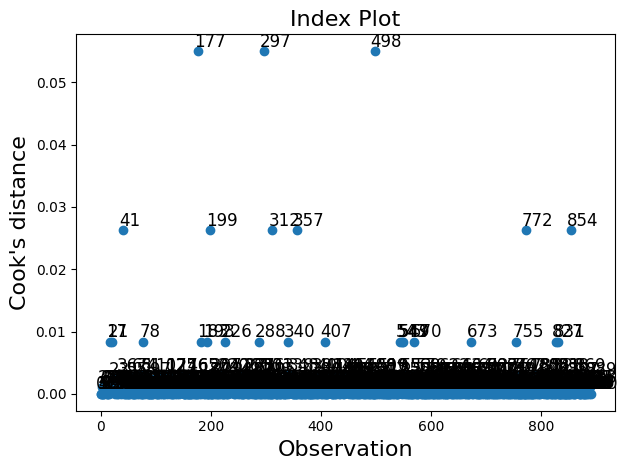

In [94]:
infl = model.get_influence()
fig = infl.plot_index(y_var="cooks")
fig.tight_layout()

In [155]:
x = sm.add_constant(x)

In [156]:
model = sm.Logit(y, x)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.452069
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.3211
Time:                        23:09:30   Log-Likelihood:                -402.79
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.792e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1125      0.406      5.203      0.000       1.317       2.908
Sex            2.6123      0.